<a href="https://colab.research.google.com/github/fridaruh/Curso_Intro_AI_Crehana/blob/master/Crehana_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Carga de Datos

Importamos las librerías que utilziaremos para cargar los datos para la red neuronal:

In [3]:
from keras.datasets import mnist
from keras import layers, models


In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
train_data.shape

(60000, 28, 28)

In [6]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show>

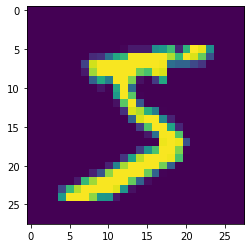

In [7]:
plt.imshow(train_data[0])
plt.show

In [8]:
train_labels[0]

5

# Modelo

In [9]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) #Tenemos 512 neuronas de entrada, que tienen una forma de 28*28 px
model.add(layers.Dense(10, activation = 'softmax')) #10 neuronas de la posible salida

In [10]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy', #Función de pérdida
              metrics = ['accuracy'] #Variable a optimizar
)

# Transformación de datos

In [11]:
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

In [12]:
x_test = test_data.reshape(10000, 28*28)
x_test = x_test.astype('float32')/255

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [17]:
train_labels[0]

5

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Entrenamiento

Iteraciones de las épocas

In [19]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.2590 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1058 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0692 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0375 - accuracy: 0.9889


# Evaluación

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0717 - accuracy: 0.9789


[0.07165476679801941, 0.9789000153541565]